<a href="https://colab.research.google.com/github/oltsaaa/Python/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. **Data overview.** Розуміння даних та їх змісту.

* Завантаж датасет, розберись зі змістом колонок, зроби їх опис.
* Вияви ключові поля, що поєднують три таблиці.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MateColab

/content/drive/MyDrive/MateColab


In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
countries_data = pd.read_csv("countries.csv")
countries_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


**name** - назва країни

**alpha-2** - код крвїни із 2 букв

**alpha-3** - код крвїни із 3 букв

**region**	 - регіон

**sub-region** - суб-регіон

In [ ]:
events_data = pd.read_csv("events.csv")
events_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


**Order ID** - код замовлення

**Order Date** - дата замовлення

**Ship Date** - дата доставки

**Order Priority** - Пріоритетність замовлення

**Country Code** - Код країни із трьох букв

**Product ID** - код продукта

**Sales Chanel** - канал продажу

**Units Sold** - кількість проданих одиниць

**Unit Price** - ціна за одиницю

**Unit Cost** - собівартість одиниці

In [ ]:
products_data = pd.read_csv("products.csv")
products_data.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


**id** - код продукту

**item_type** - тип продукту

**таблиця events_data (її колонка Country Code) - зʼєднуватиметься з таблицею countries_data (колонка alpha-3)**

**таблиця events_data (її колонка Product ID) - зʼєднуватиметься з таблицею products_data
 (колонка id)**

###2. **Data cleaning.** Робота із пропущеними даними, некоректними даними, аномаліями.


* Подивись, чи є пропущені значення у кожній таблиці, оціни їх долю, спробуй зрозуміти причини їх виникнення.
* Заповни або видали пропущені значення, обґрунтувавши свою думку.
* Подивись, чи всі типи даних розпізнаються коректно. Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.
* Досліди дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.
* Досліди дані на наявність аномалій. Якщо є, спробуй зрозуміти причини.

####**countries_data Data cleaning**

In [ ]:
print(countries_data.shape)


(249, 5)


У датасеті є 249 рядків та 5 колонок


In [ ]:
countries_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


деякі стовпчики мають пропущені значення

In [ ]:
print(countries_data.isna().sum())


name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
print(countries_data.isna().sum() / countries_data.shape[0] * 100)


name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
countries_data[countries_data.isna().any(axis=1)]


,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


так як це одна країна, можна знайти її регіон та субрегін та замінити значення NaN

In [ ]:
countries_data['region'] = countries_data['region'].fillna('Africa')

In [ ]:
countries_data["sub-region"] = countries_data["sub-region"].fillna("Southern Africa")

In [ ]:
print(countries_data.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
#checking for duplicates in data
duplicate_rows = countries_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())


0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


дублікатів немає

countries_data Data cleaning

####**products_data Data cleaning**

In [ ]:
print(products_data.shape)


(12, 2)


У датасеті є 12 рядків та 2 колонок


In [ ]:
products_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
print(products_data.isna().sum())


id           0
item_type    0
dtype: int64


немає пропущених значень

In [ ]:
#checking for duplicates in data
duplicate_rows = products_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


дублікатів немає

####**events_data Data cleaning**

In [ ]:
print(events_data.shape)


(1330, 10)


У датасеті є 1330 рядків та 10 колонок


In [ ]:
events_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Order Date та Ship Date мають неправильний тип даних

In [ ]:
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])


In [ ]:
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:
print(events_data.isna().sum())


Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


є пропущені значення

In [ ]:
print(events_data.isna().sum() / events_data.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Пропоную видалити дублікати Units Sold, адже їх мало та ми не зможемо дізнатися цю інформацію

Також ми не зможемо і дізнатися код країни. Цих значень є багато, тому пропоную замінити на unknown


In [ ]:

events_data = events_data.dropna(subset=['Units Sold'])


In [ ]:
events_data['Country Code'] = events_data['Country Code'].fillna('unknown')


<ipython-input-29-f85cdcbccd67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_data['Country Code'] = events_data['Country Code'].fillna('unknown')


In [ ]:
print(events_data.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


In [ ]:
#checking for duplicates in data
duplicate_rows = events_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


дублікатів немає

###3.**Data analysis** **and visualization.** Аналіз та візуалізація даних, знаходження цінних інсайтів.

* Проведи з’єднання трьох таблиць в один датафрейм. Видали непотрібні для аналізу колонки. За потреби, зроби перейменування колонок.
* Розпочни з ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).
* Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

    * категорій товарів;
    * географії (країн, регіонів);
    * каналів продажу (онлайн або офлайн).

* Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

    * категорій товарів;
    * країн;
    * регіонів.

* Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару. Зроби потрібні для цього агрегування та візуалізації.
* Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.
* Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

💡 Для знаходження дня тижня за датою скористайся методом day_name().

####**Зʼєднання таблиць**

In [ ]:
events_data.columns = events_data.columns.str.lower().str.replace(" ", "_")
countries_data.columns = countries_data.columns.str.lower().str.replace(" ", "_")
products_data.columns = products_data.columns.str.lower().str.replace(" ", "_")

In [ ]:
countries_data.rename(columns={"alpha-3": "country_code"}, inplace=True)
products_data.rename(columns={"id": "product_id"}, inplace=True)

In [ ]:
events_data.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,2014-07-18,2014-08-11,M,unknown,7940,Online,4693.0,668.27,502.54
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
countries_data.head()

,name,alpha-2,country_code,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
products_data.head()

,product_id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
events_countries_join = pd.merge(events_data, countries_data, on = "country_code", how = "inner")
data = pd.merge(events_countries_join, products_data, on = "product_id", how = "inner")
data.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,alpha-2,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,Europe,Eastern Europe,Office Supplies


In [ ]:
data.rename(columns={"name": "country"}, inplace=True)
data.rename(columns={"item_type": "product_category"}, inplace=True)
data.drop(columns=["alpha-2", "country_code", "product_id"], inplace=True)

In [ ]:
data.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,product_category
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


In [ ]:
data.shape

(1246, 12)

####**Загальні метрики**


**Загальні продажі**

In [ ]:
total_orders = data["order_id"].nunique()
total_orders

1246

**Загальний прибуток**

In [ ]:
data["unit_profit"] = data["unit_price"] - data["unit_cost"]
total_profit = data["unit_profit"].sum()
total_profit

97055.04999999999

**Кількість країн**

In [ ]:
total_countries_covered = data["country"].nunique()
total_countries_covered

45

**Середній прибуток замовлення**

In [ ]:
data["revenue_per_order"] = data["unit_price"] * data["units_sold"]
data["profit_per_order"] = data["unit_profit"] * data["units_sold"]
average_order_profit = data["profit_per_order"].mean()
average_order_profit


380183.8162600321

**Середня ціна товару**

In [ ]:
mean_unit_price = data["unit_price"].mean()
mean_unit_price

264.2033868378812

**Кількість категорій**

In [ ]:
unique_category = data["product_category"].nunique()
unique_category

12

In [ ]:
data["cost_per_order"] = data["unit_cost"] * data["units_sold"]

In [ ]:
data.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,product_category,unit_profit,revenue_per_order,profit_per_order,cost_per_order
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,88.59,133705.00,57583.50,76121.50
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,88.59,409960.10,176559.87,233400.23
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,73.44,127966.88,85998.24,41968.64
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,15.66,362897.60,119767.68,243129.92
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,126.25,1445686.20,280275.00,1165411.20


####**Аналіз та візуалізації продажів (доходи, витрати, прибутки, популярність товарів) за категоріями, каналами продажів та країнами**

#####**Аналіз категорій**

In [ ]:
top_product_category = data["product_category"].value_counts()
top_product_category

,count
product_category,
Beverages,113
Office Supplies,113
Cosmetics,108
Personal Care,108
Vegetables,105
Baby Food,105
Fruits,103
Clothes,102
Meat,102


найпопулярніша категорія товарів за частотою замовлень Beverages та Office Supplies


In [ ]:
popular_category_units = data.groupby("product_category")["units_sold"].sum().sort_values(ascending=False)
popular_category_units

,units_sold
product_category,
Office Supplies,581481.0
Clothes,579313.0
Beverages,577991.0
Vegetables,532510.0
Fruits,531135.0
Personal Care,530360.0
Baby Food,524265.0
Cosmetics,506188.0
Meat,477233.0


За кількістю одиниць найпопулярнішими є Office Supplies, Clothes	 та Beverages

<ipython-input-115-cb3ab68b342d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=popular_category_units.index, y=popular_category_units.values, palette="viridis", )


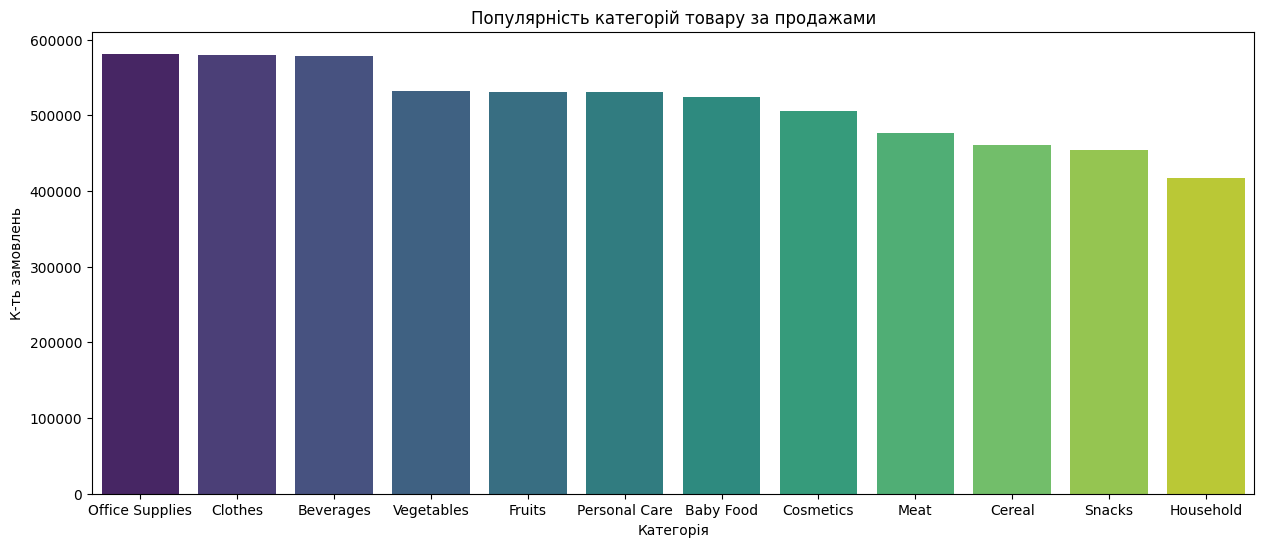

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot( x=popular_category_units.index, y=popular_category_units.values, palette="viridis", )
plt.title("Популярність категорій товару за продажами")
plt.xlabel("Категорія")
plt.ylabel("К-ть замовлень")
plt.show()

In [ ]:
data["revenue_per_order"] = pd.to_numeric(data["revenue_per_order"])
data["profit_per_order"] = pd.to_numeric(data["profit_per_order"])
data["cost_per_order"] = pd.to_numeric(data["cost_per_order"])


In [ ]:
popular_category_profit = data.groupby("product_category")["profit_per_order"].sum().sort_values(ascending=False).reset_index()
pd.options.display.float_format = '{:,.2f}'.format

popular_category_profit

,product_category,profit_per_order
0,Office Supplies,"378,666,242.01"
1,Household,"278,874,417.16"
2,Cosmetics,"221,305,393.60"
3,Meat,"201,339,830.37"
4,Baby Food,"133,834,369.20"
5,Cereal,"94,676,716.20"
6,Vegetables,"82,038,490.60"
7,Snacks,"69,213,492.18"
8,Clothes,"63,307,324.64"
9,Personal Care,"43,346,322.80"


<ipython-input-170-a1b85336e7af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = popular_category_profit, x= "product_category", y= "profit_per_order", palette="viridis", )


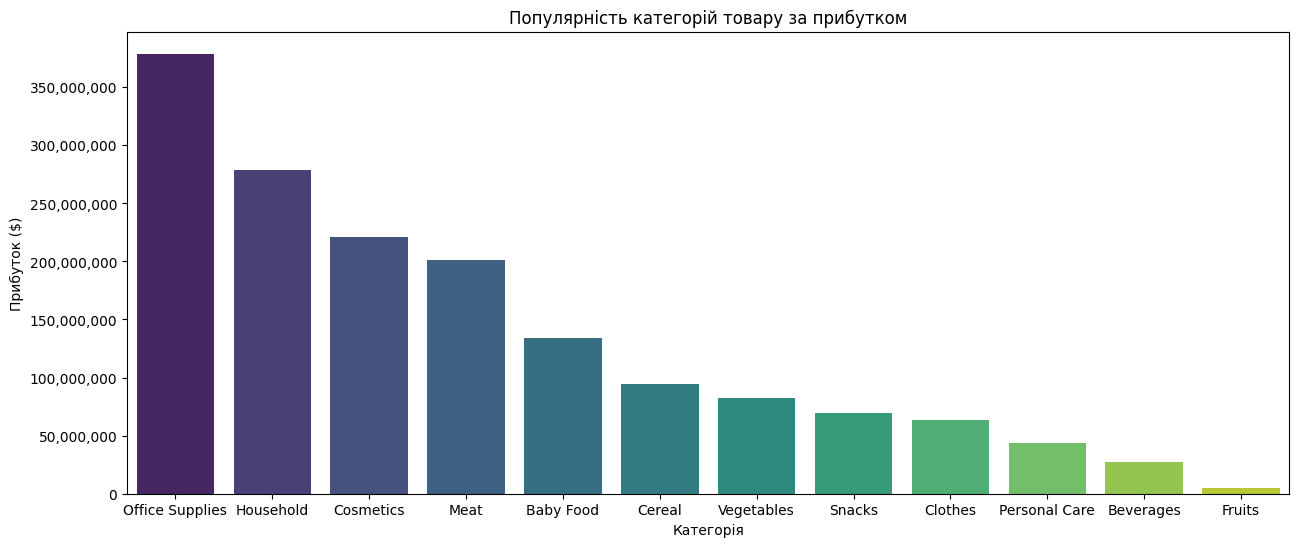

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 6))
sns.barplot( data = popular_category_profit, x= "product_category", y= "profit_per_order", palette="viridis", )
plt.title("Популярність категорій товару за прибутком")
plt.xlabel("Категорія")
plt.ylabel("Прибуток ($)")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

In [ ]:
popular_category_cost = data.groupby("product_category")["cost_per_order"].sum().sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
print(popular_category_cost)


product_category
Office Supplies   378,666,242.01
Household         278,874,417.16
Cosmetics         221,305,393.60
Meat              201,339,830.37
Baby Food         133,834,369.20
Cereal             94,676,716.20
Vegetables         82,038,490.60
Snacks             69,213,492.18
Clothes            63,307,324.64
Personal Care      43,346,322.80
Beverages          27,425,672.95
Fruits              4,955,489.55
Name: cost_per_order, dtype: float64


In [ ]:
popular_category_revenue = data.groupby("product_category")["revenue_per_order"].sum().sort_values(ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
popular_category_revenue


,revenue_per_order
product_category,
Office Supplies,"378,666,242.01"
Household,"278,874,417.16"
Cosmetics,"221,305,393.60"
Meat,"201,339,830.37"
Baby Food,"133,834,369.20"
Cereal,"94,676,716.20"
Vegetables,"82,038,490.60"
Snacks,"69,213,492.18"
Clothes,"63,307,324.64"


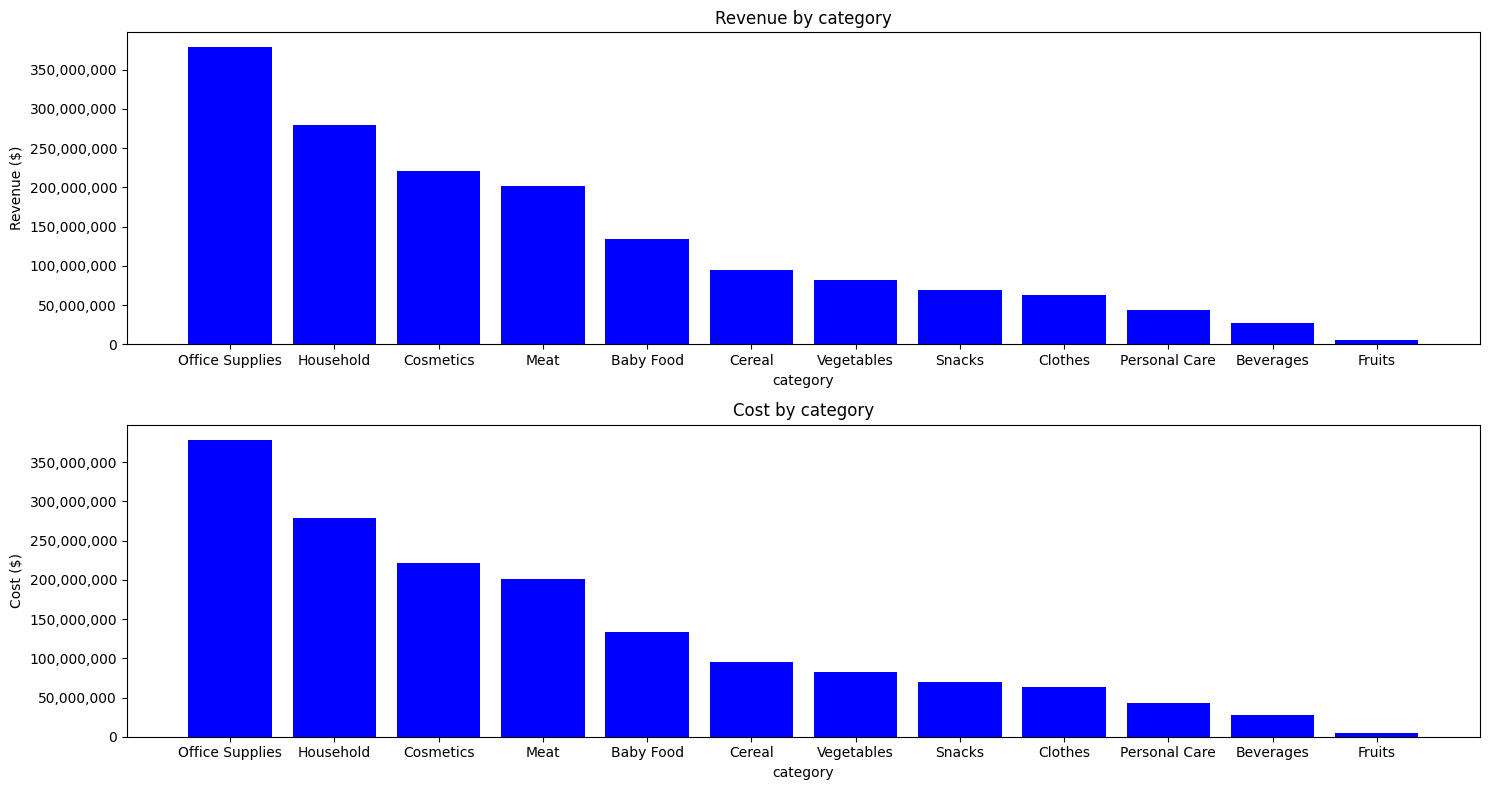

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

ax[0].bar(popular_category_revenue.index, popular_category_revenue.values, color="blue")
ax[0].set_title("Revenue by category")
ax[0].set_xlabel("category")
ax[0].set_ylabel("Revenue ($)")
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти



ax[1].bar(popular_category_cost.index, popular_category_cost.values, color="blue")
ax[1].set_title("Cost by category")
ax[1].set_xlabel("category")
ax[1].set_ylabel("Cost ($)")
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти


plt.tight_layout()


plt.show()

#####**Аналіз каналів продажів**

In [ ]:
top_sales_channel = data["sales_channel"].value_counts()
top_sales_channel

,count
sales_channel,
online,625
offline,621


було виявлено неоднорідність даних


In [ ]:
data["sales_channel"] = data["sales_channel"].str.lower()

In [ ]:
top_sales_channel = data["sales_channel"].value_counts()
top_sales_channel

,count
sales_channel,
online,625
offline,621


In [ ]:
popular_sales_channel = data.groupby("sales_channel")["units_sold"].sum().sort_values(ascending=False)
popular_sales_channel

,units_sold
sales_channel,
offline,"3,113,412.00"
online,"3,058,259.00"


<ipython-input-176-5eaf0fc28fe8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=popular_sales_channel.index, y=popular_sales_channel.values, palette="viridis", )


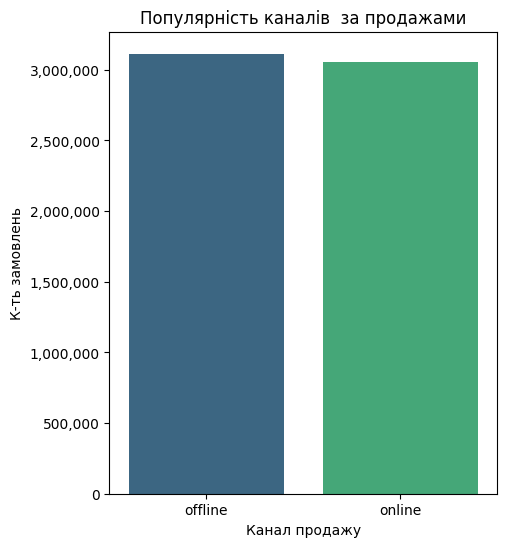

In [ ]:
plt.figure(figsize=(5, 6))
sns.barplot( x=popular_sales_channel.index, y=popular_sales_channel.values, palette="viridis", )
plt.title("Популярність каналів  за продажами")
plt.xlabel("Канал продажу")
plt.ylabel("К-ть замовлень")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

In [ ]:
sales_channel_profit = data.groupby("sales_channel")["profit_per_order"].sum().sort_values(ascending=False)
sales_channel_profit

,profit_per_order
sales_channel,
offline,"810,030,465.24"
online,"788,953,296.02"


<ipython-input-179-f20777810676>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=sales_channel_profit.index, y=sales_channel_profit.values, palette="viridis", )


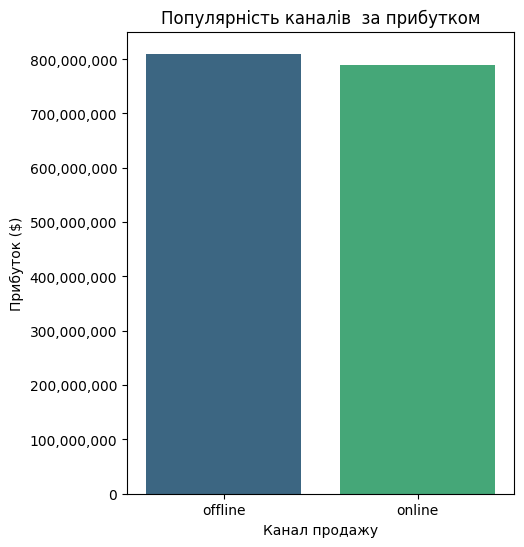

In [ ]:
plt.figure(figsize=(5, 6))
sns.barplot( x=sales_channel_profit.index, y=sales_channel_profit.values, palette="viridis", )
plt.title("Популярність каналів  за прибутком")
plt.xlabel("Канал продажу")
plt.ylabel("Прибуток ($)")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

In [ ]:
sales_channel_cost = data.groupby("sales_channel")["cost_per_order"].sum().sort_values(ascending=False)
sales_channel_cost

,cost_per_order
sales_channel,
offline,"810,030,465.24"
online,"788,953,296.02"


In [ ]:
sales_channel_revenue = data.groupby("sales_channel")["revenue_per_order"].sum().sort_values(ascending=False)
sales_channel_revenue

,revenue_per_order
sales_channel,
offline,"810,030,465.24"
online,"788,953,296.02"


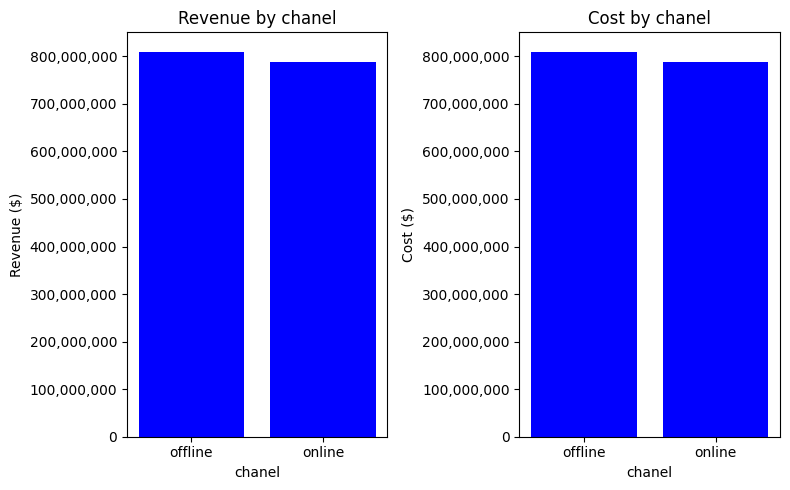

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].bar(sales_channel_revenue.index, sales_channel_revenue.values, color="blue")
ax[0].set_title("Revenue by chanel")
ax[0].set_xlabel("chanel")
ax[0].set_ylabel("Revenue ($)")
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти



ax[1].bar(sales_channel_cost.index, sales_channel_cost.values, color="blue")
ax[1].set_title("Cost by chanel")
ax[1].set_xlabel("chanel")
ax[1].set_ylabel("Cost ($)")
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти


plt.tight_layout()


plt.show()

#####**Аналіз за країнами**

In [ ]:
top_country = data["country"].value_counts()
top_country

,count
country,
Andorra,40
San Marino,40
Romania,34
Bosnia and Herzegovina,33
Ukraine,33
Greece,32
Macedonia,32
Malta,32
Russia,32


In [ ]:
popular_country = data.groupby("country")["units_sold"].sum().sort_values(ascending=False)
top_10_countries_by_orders = popular_country.head(10)
top_10_countries_by_orders

,units_sold
country,
Macedonia,"203,078.00"
San Marino,"192,228.00"
Andorra,"185,686.00"
Greece,"176,859.00"
Malta,"173,641.00"
Serbia,"170,369.00"
Romania,"166,882.00"
Russia,"165,954.00"
Ukraine,"164,577.00"


<ipython-input-184-4b703976cd8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_10_countries_by_orders.index, y=top_10_countries_by_orders.values, palette="viridis" )


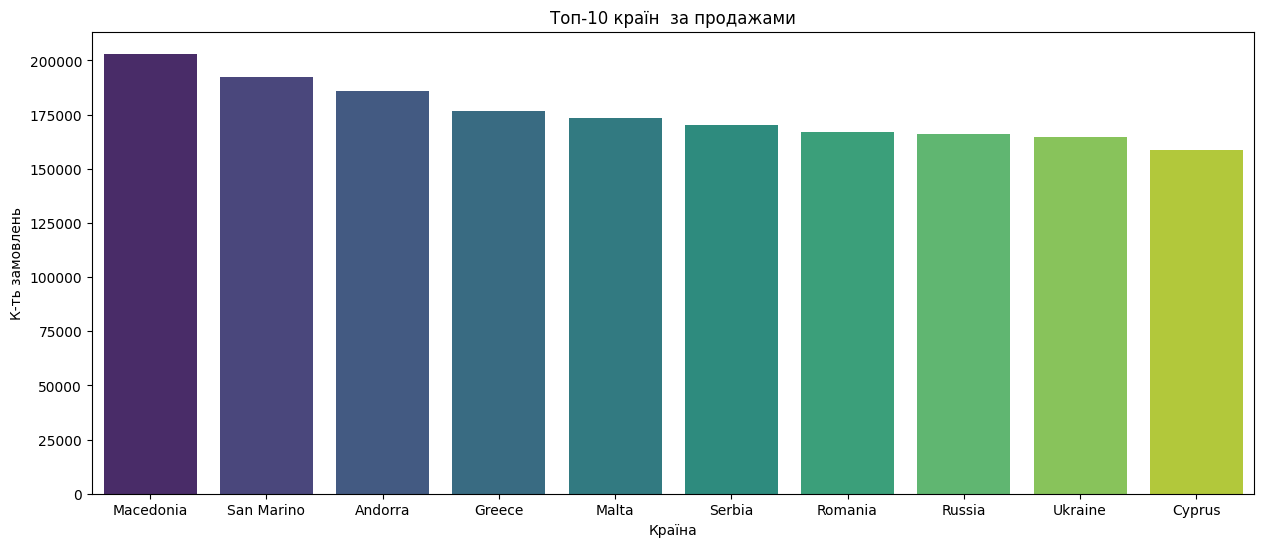

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot( x=top_10_countries_by_orders.index, y=top_10_countries_by_orders.values, palette="viridis" )
plt.title("Топ-10 країн  за продажами")
plt.xlabel("Країна")
plt.ylabel("К-ть замовлень")
plt.show()

In [ ]:
country_profit = data.groupby("country")["profit_per_order"].sum().sort_values(ascending=False)
top_10_countries_by_profit = country_profit.head(10)
top_10_countries_by_profit

,profit_per_order
country,
Czech Republic,"53,543,932.14"
Ukraine,"53,252,317.54"
Bosnia and Herzegovina,"50,117,508.49"
Macedonia,"49,222,085.25"
San Marino,"47,883,708.48"
Andorra,"47,756,693.17"
Portugal,"47,172,189.84"
Malta,"47,145,320.81"
Russia,"46,051,659.81"


<ipython-input-187-009e1717689f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=top_10_countries_by_profit.index, y=top_10_countries_by_profit.values, palette="viridis", )


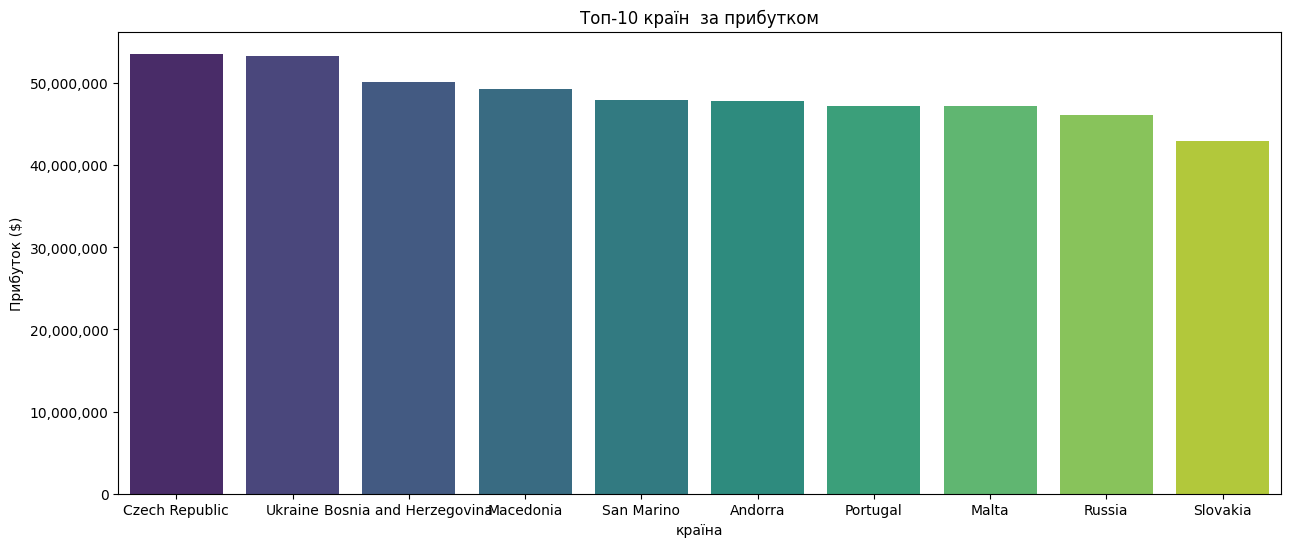

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot( x=top_10_countries_by_profit.index, y=top_10_countries_by_profit.values, palette="viridis", )
plt.title("Топ-10 країн  за прибутком")
plt.xlabel("країна")
plt.ylabel("Прибуток ($)")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

In [ ]:
country_cost = data.groupby("country")["cost_per_order"].sum().sort_values(ascending=False)
top_10_countries_by_cost = country_cost.head(10)
top_10_countries_by_cost

,cost_per_order
country,
Czech Republic,"53,543,932.14"
Ukraine,"53,252,317.54"
Bosnia and Herzegovina,"50,117,508.49"
Macedonia,"49,222,085.25"
San Marino,"47,883,708.48"
Andorra,"47,756,693.17"
Portugal,"47,172,189.84"
Malta,"47,145,320.81"
Russia,"46,051,659.81"


In [ ]:
country_revenue = data.groupby("country")["revenue_per_order"].sum().sort_values(ascending=False)
top_10_countries_by_revenue = country_revenue.head(10)
top_10_countries_by_revenue

,revenue_per_order
country,
Czech Republic,"53,543,932.14"
Ukraine,"53,252,317.54"
Bosnia and Herzegovina,"50,117,508.49"
Macedonia,"49,222,085.25"
San Marino,"47,883,708.48"
Andorra,"47,756,693.17"
Portugal,"47,172,189.84"
Malta,"47,145,320.81"
Russia,"46,051,659.81"


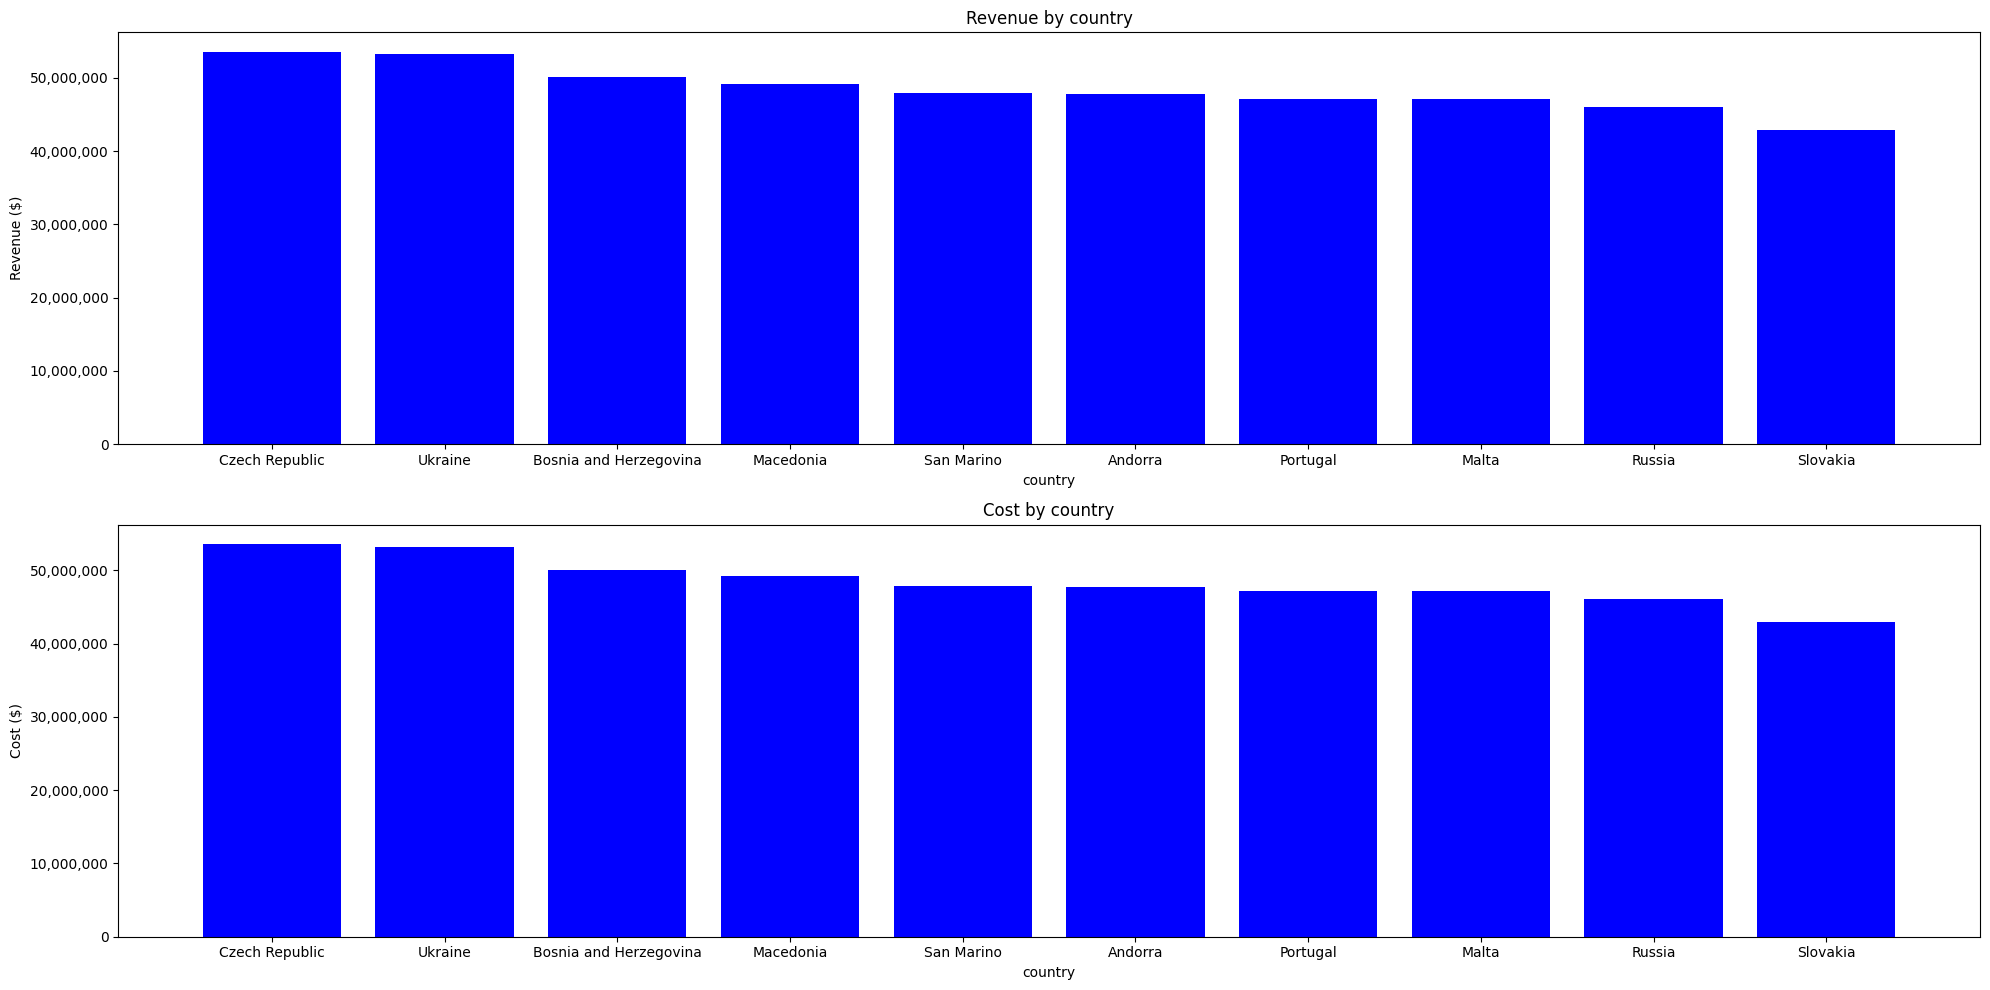

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax[0].bar(top_10_countries_by_revenue.index, top_10_countries_by_revenue.values, color="blue")
ax[0].set_title("Revenue by country")
ax[0].set_xlabel("country")
ax[0].set_ylabel("Revenue ($)")
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти



ax[1].bar(top_10_countries_by_cost.index, top_10_countries_by_cost.values, color="blue")
ax[1].set_title("Cost by country")
ax[1].set_xlabel("country")
ax[1].set_ylabel("Cost ($)")
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Формат Y без експоненти


plt.tight_layout()


plt.show()

####**Інтервал часу між замовленням та його відвантаженням в розрізі категорій товарів; країн; регіонів.**

In [ ]:
data["shipping_time"] = (data["ship_date"] - data["order_date"]).dt.days

In [ ]:
data.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,product_category,unit_profit,revenue_per_order,profit_per_order,cost_per_order,shipping_time,year_month
0,100640618,2014-10-08,2014-10-18,M,online,650.00,205.70,117.11,Norway,Europe,Northern Europe,Cereal,88.59,"133,705.00","133,705.00","133,705.00",10,2014-10
1,100983083,2016-08-11,2016-08-11,C,offline,"1,993.00",205.70,117.11,Serbia,Europe,Southern Europe,Cereal,88.59,"409,960.10","409,960.10","409,960.10",0,2016-08
2,102230632,2017-05-13,2017-06-13,L,online,"1,171.00",109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,73.44,"127,966.88","127,966.88","127,966.88",31,2017-05
3,103435266,2012-08-11,2012-09-18,H,offline,"7,648.00",47.45,31.79,Serbia,Europe,Southern Europe,Beverages,15.66,"362,897.60","362,897.60","362,897.60",38,2012-08
4,103450715,2015-03-15,2015-04-18,H,online,"2,220.00",651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,126.25,"1,445,686.20","1,445,686.20","1,445,686.20",34,2015-03


<ipython-input-205-7f152e71aae4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="product_category", y="shipping_time", palette="viridis")


Text(0, 0.5, 'Дні до відвантаження')

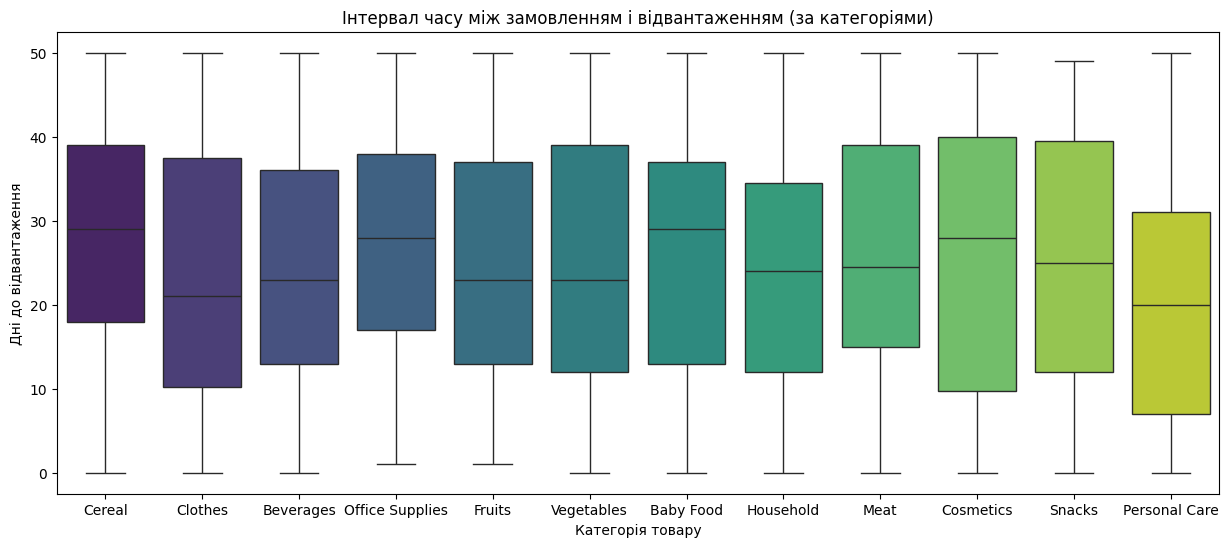

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x="product_category", y="shipping_time", palette="viridis")
plt.title("Інтервал часу між замовленням і відвантаженням (за категоріями)")
plt.xlabel("Категорія товару")
plt.ylabel("Дні до відвантаження")

<ipython-input-76-7ff546c7c1d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="magma")


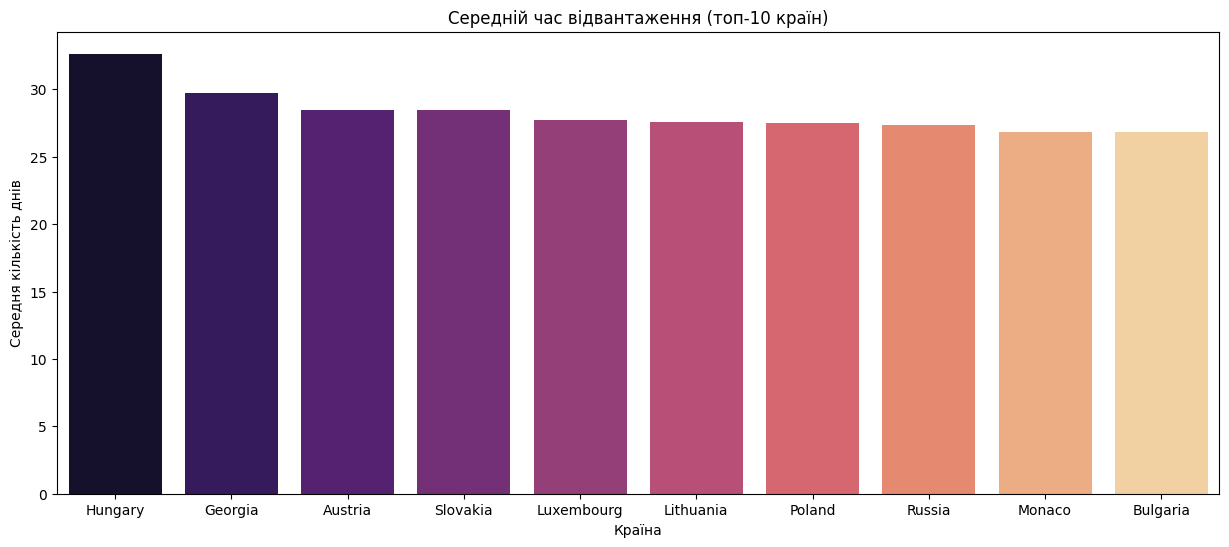

In [ ]:
plt.figure(figsize=(15, 6))
top_10_countries = data.groupby("country")["shipping_time"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="magma")
plt.title("Середній час відвантаження (топ-10 країн)")
plt.xlabel("Країна")
plt.ylabel("Середня кількість днів")

plt.show()


<ipython-input-77-ecdff37610d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="shipping_time", data=data, palette="coolwarm")


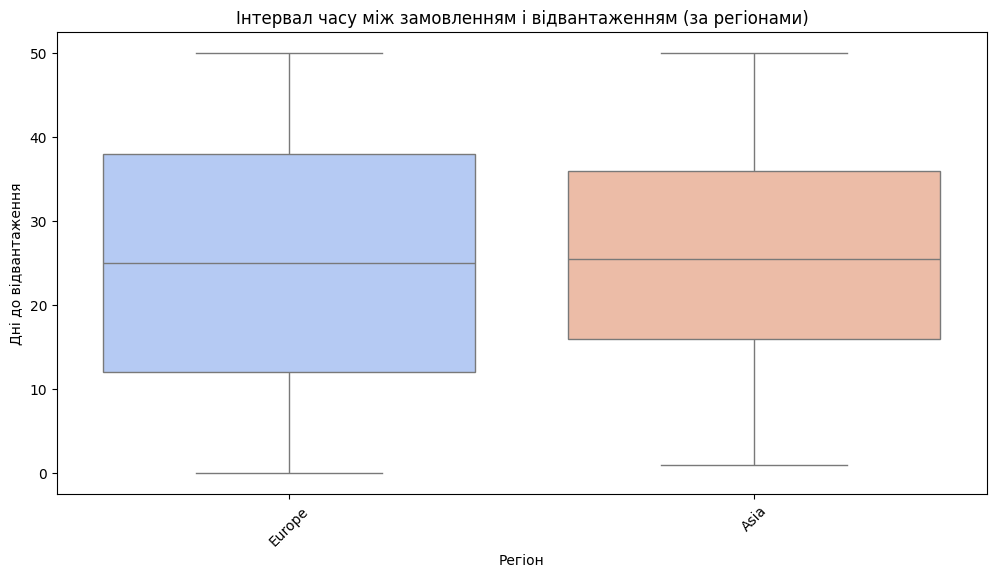

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="region", y="shipping_time", data=data, palette="coolwarm")

plt.title("Інтервал часу між замовленням і відвантаженням (за регіонами)")
plt.xlabel("Регіон")
plt.ylabel("Дні до відвантаження")
plt.xticks(rotation=45)

plt.show()


####**Залежність прибутку від часу, необхідного на відвантаження товару**

In [ ]:
profit_shipping_data = data.groupby('shipping_time')['profit_per_order'].mean().reset_index()
profit_shipping_data.head()

,shipping_time,profit_per_order
0,0,"1,009,508.21"
1,1,"1,105,619.14"
2,2,"946,078.36"
3,3,"908,854.51"
4,4,"888,009.01"


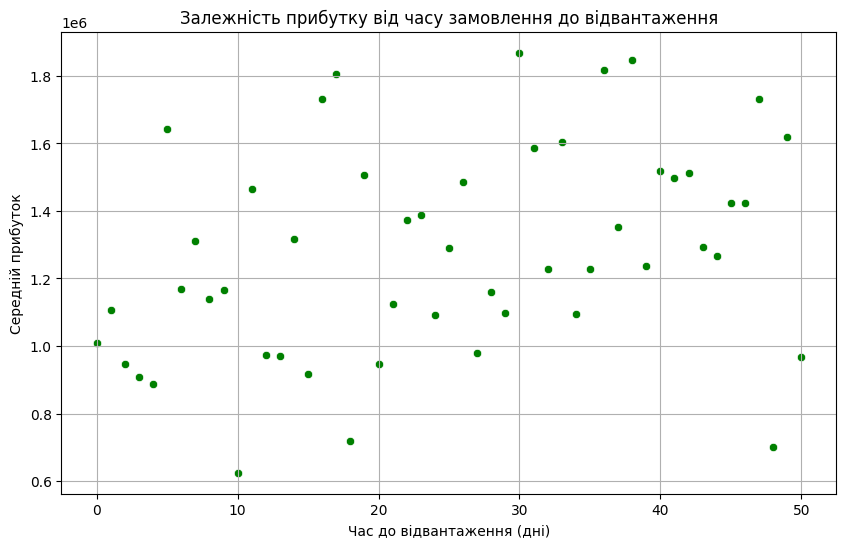

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=profit_shipping_data, x='shipping_time', y='profit_per_order', color='g')

plt.title("Залежність прибутку від часу замовлення до відвантаження")
plt.xlabel("Час до відвантаження (дні)")
plt.ylabel("Середній прибуток")
plt.grid(True)
plt.show()



можна побачити незначну тенденцію зростання, однак варто перевірити кореляцію

In [ ]:
correlation = profit_shipping_data['shipping_time'].corr(profit_shipping_data['profit_per_order'])
print(f"Кореляція між часом до відвантаження та прибутком: {correlation}")


Кореляція між часом до відвантаження та прибутком: 0.33991464282047623


звʼязок є досить слабким

####**Динаміка продажів у часі  у розрізі категорій товарів, країн, регіонів.**

In [ ]:
data['year_month'] = data['order_date'].dt.to_period('M')
data.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,product_category,unit_profit,revenue_per_order,profit_per_order,cost_per_order,shipping_time,year_month
0,100640618,2014-10-08,2014-10-18,M,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,88.59,133705.00,57583.50,76121.50,10,2014-10
1,100983083,2016-08-11,2016-08-11,C,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,88.59,409960.10,176559.87,233400.23,0,2016-08
2,102230632,2017-05-13,2017-06-13,L,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,73.44,127966.88,85998.24,41968.64,31,2017-05
3,103435266,2012-08-11,2012-09-18,H,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,15.66,362897.60,119767.68,243129.92,38,2012-08
4,103450715,2015-03-15,2015-04-18,H,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,126.25,1445686.20,280275.00,1165411.20,34,2015-03


In [ ]:
data["order_date"] = pd.to_datetime(data["order_date"])


In [ ]:

by_category_data = data.groupby(["product_category", "year_month"])["units_sold"].sum().reset_index()
by_category_data.head()


,product_category,year_month,units_sold
0,Baby Food,2010-01,"16,254.00"
1,Baby Food,2010-02,"4,983.00"
2,Baby Food,2010-03,"6,833.00"
3,Baby Food,2010-05,"4,840.00"
4,Baby Food,2010-06,"12,968.00"


In [ ]:
# Create time series plots by gender
categories = by_category_data["product_category"].unique()



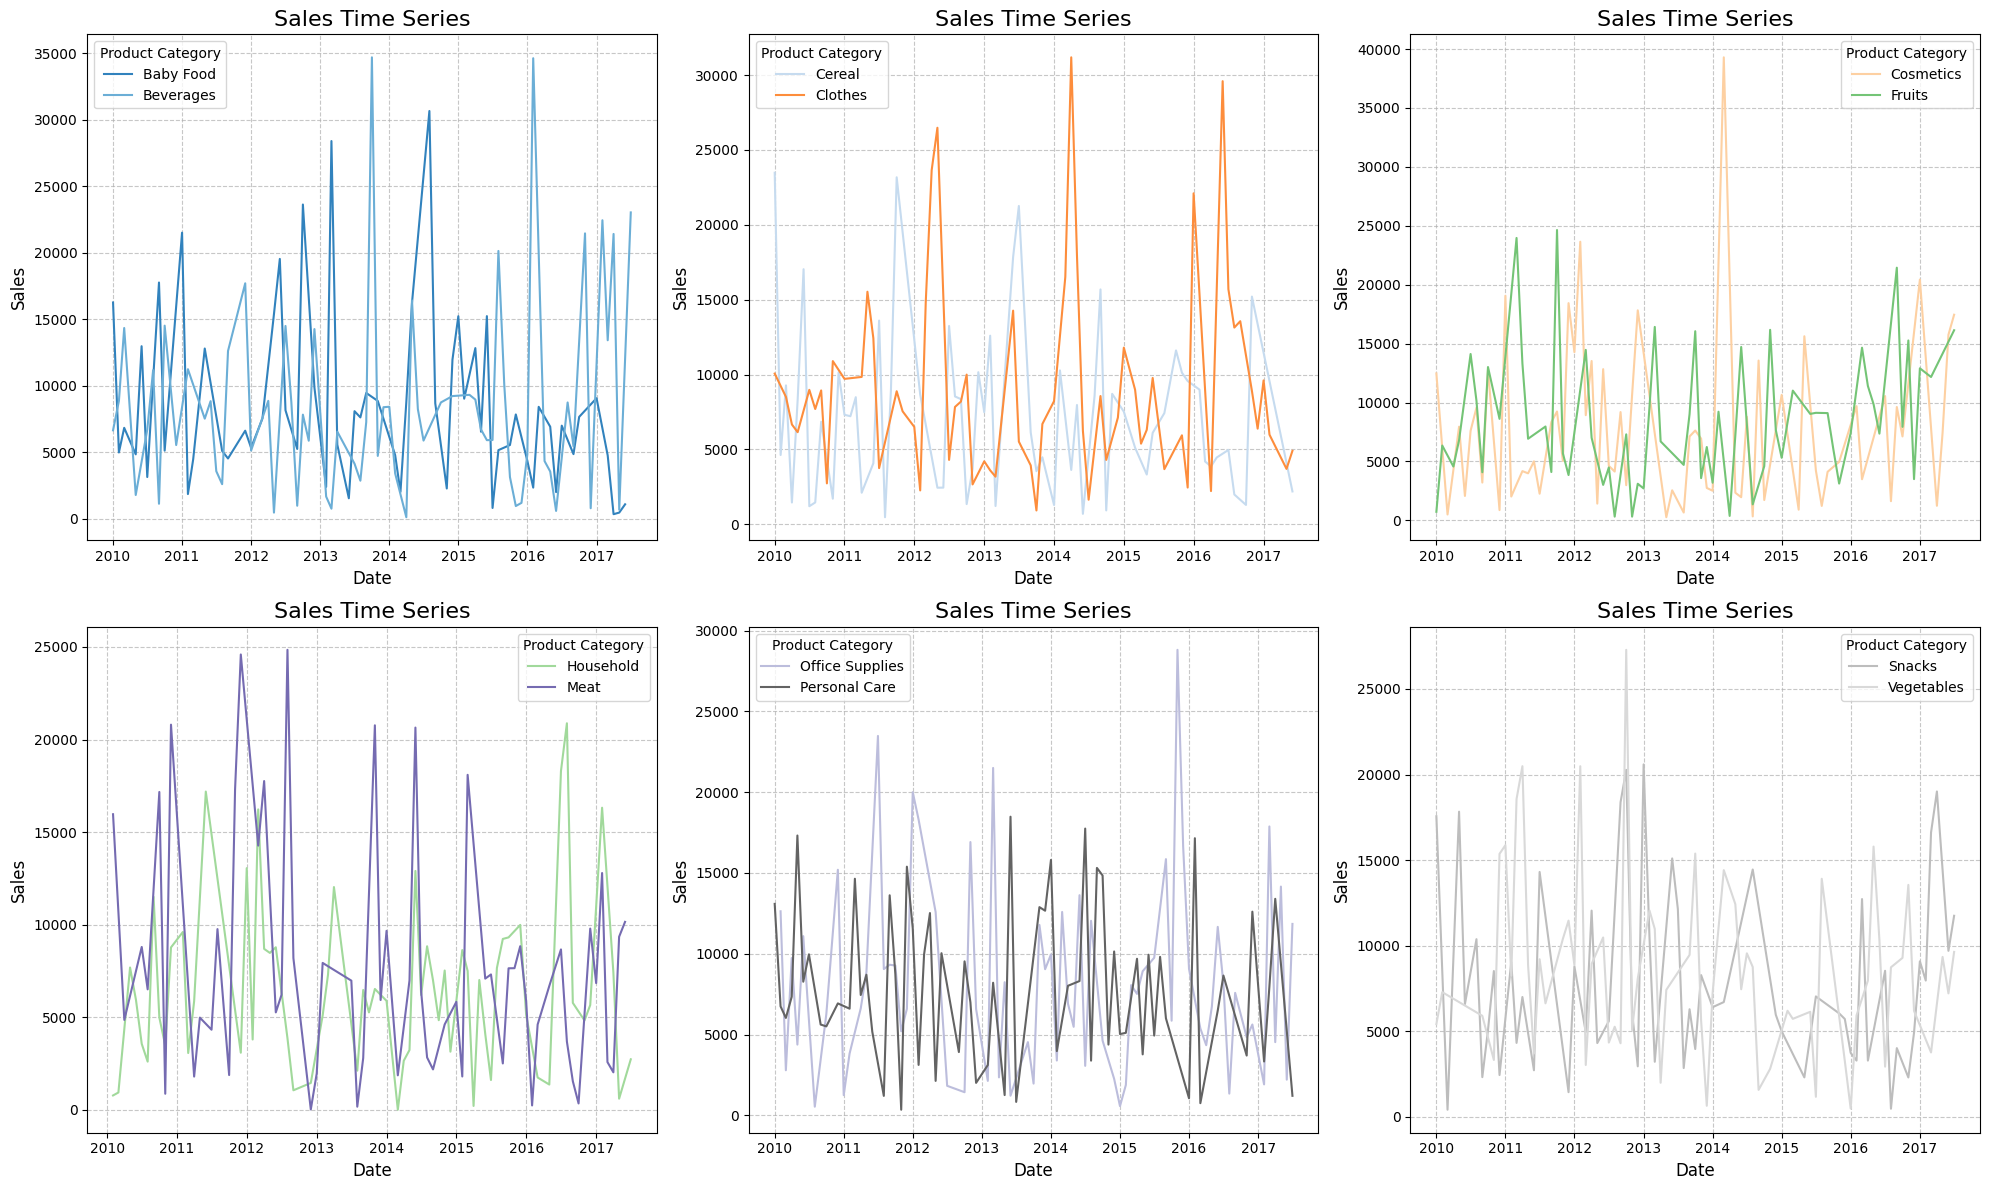

In [ ]:

# Кількість підграфіків: 6
num_rows = 2  # 2 рядки
num_cols = 3  # 3 стовпці

# Список кольорів для кожної категорії
colors = plt.cm.tab20c(np.linspace(0, 1, len(categories)))

# Налаштування розміру графіка
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Розподіляємо категорії на 6 графіків
categories_split = [categories[i:i + 2] for i in range(0, len(categories), 2)]

# Якщо категорій більше, ніж 6, додамо додаткові категорії в останній графік
while len(categories_split) < 6:
    categories_split.append([categories[-1]])

# Створення графіків для кожної групи категорій
for row in range(num_rows):
    for col in range(num_cols):
        ax = axes[row, col]

        # Отримуємо категорії для поточного підграфіка
        for idx, category in enumerate(categories_split[row * num_cols + col]):
            category_data = by_category_data[by_category_data["product_category"] == category]
            ax.plot(
                category_data["order_date"],  # Дані для осі X
                category_data["units_sold"],  # Дані для осі Y
                label=category,
                color=colors[categories.tolist().index(category)]  # Встановлюємо колір для кожної категорії
            )

        # Налаштування підграфіка
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel("Sales", fontsize=12)
        ax.set_title(f"Sales Time Series", fontsize=16)
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.legend(title="Product Category")

# Автоматичне розміщення підписів
plt.tight_layout()

# Відображення графіків
plt.show()






Можна побачити, що всі продажі по категоріях були на одному півні. Однак, у деяких місяцях можна побачити піки


In [ ]:

by_country_data = data.groupby(["country", "order_date"])["units_sold"].sum().reset_index()
by_country_data.head()

,country,order_date,units_sold
0,Albania,2010-08-23,"9,560.00"
1,Albania,2010-11-12,865.00
2,Albania,2010-12-02,"1,891.00"
3,Albania,2010-12-20,"5,534.00"
4,Albania,2011-04-07,"9,843.00"


In [ ]:
# Create time series plots by gender
countries = by_country_data["country"].unique()

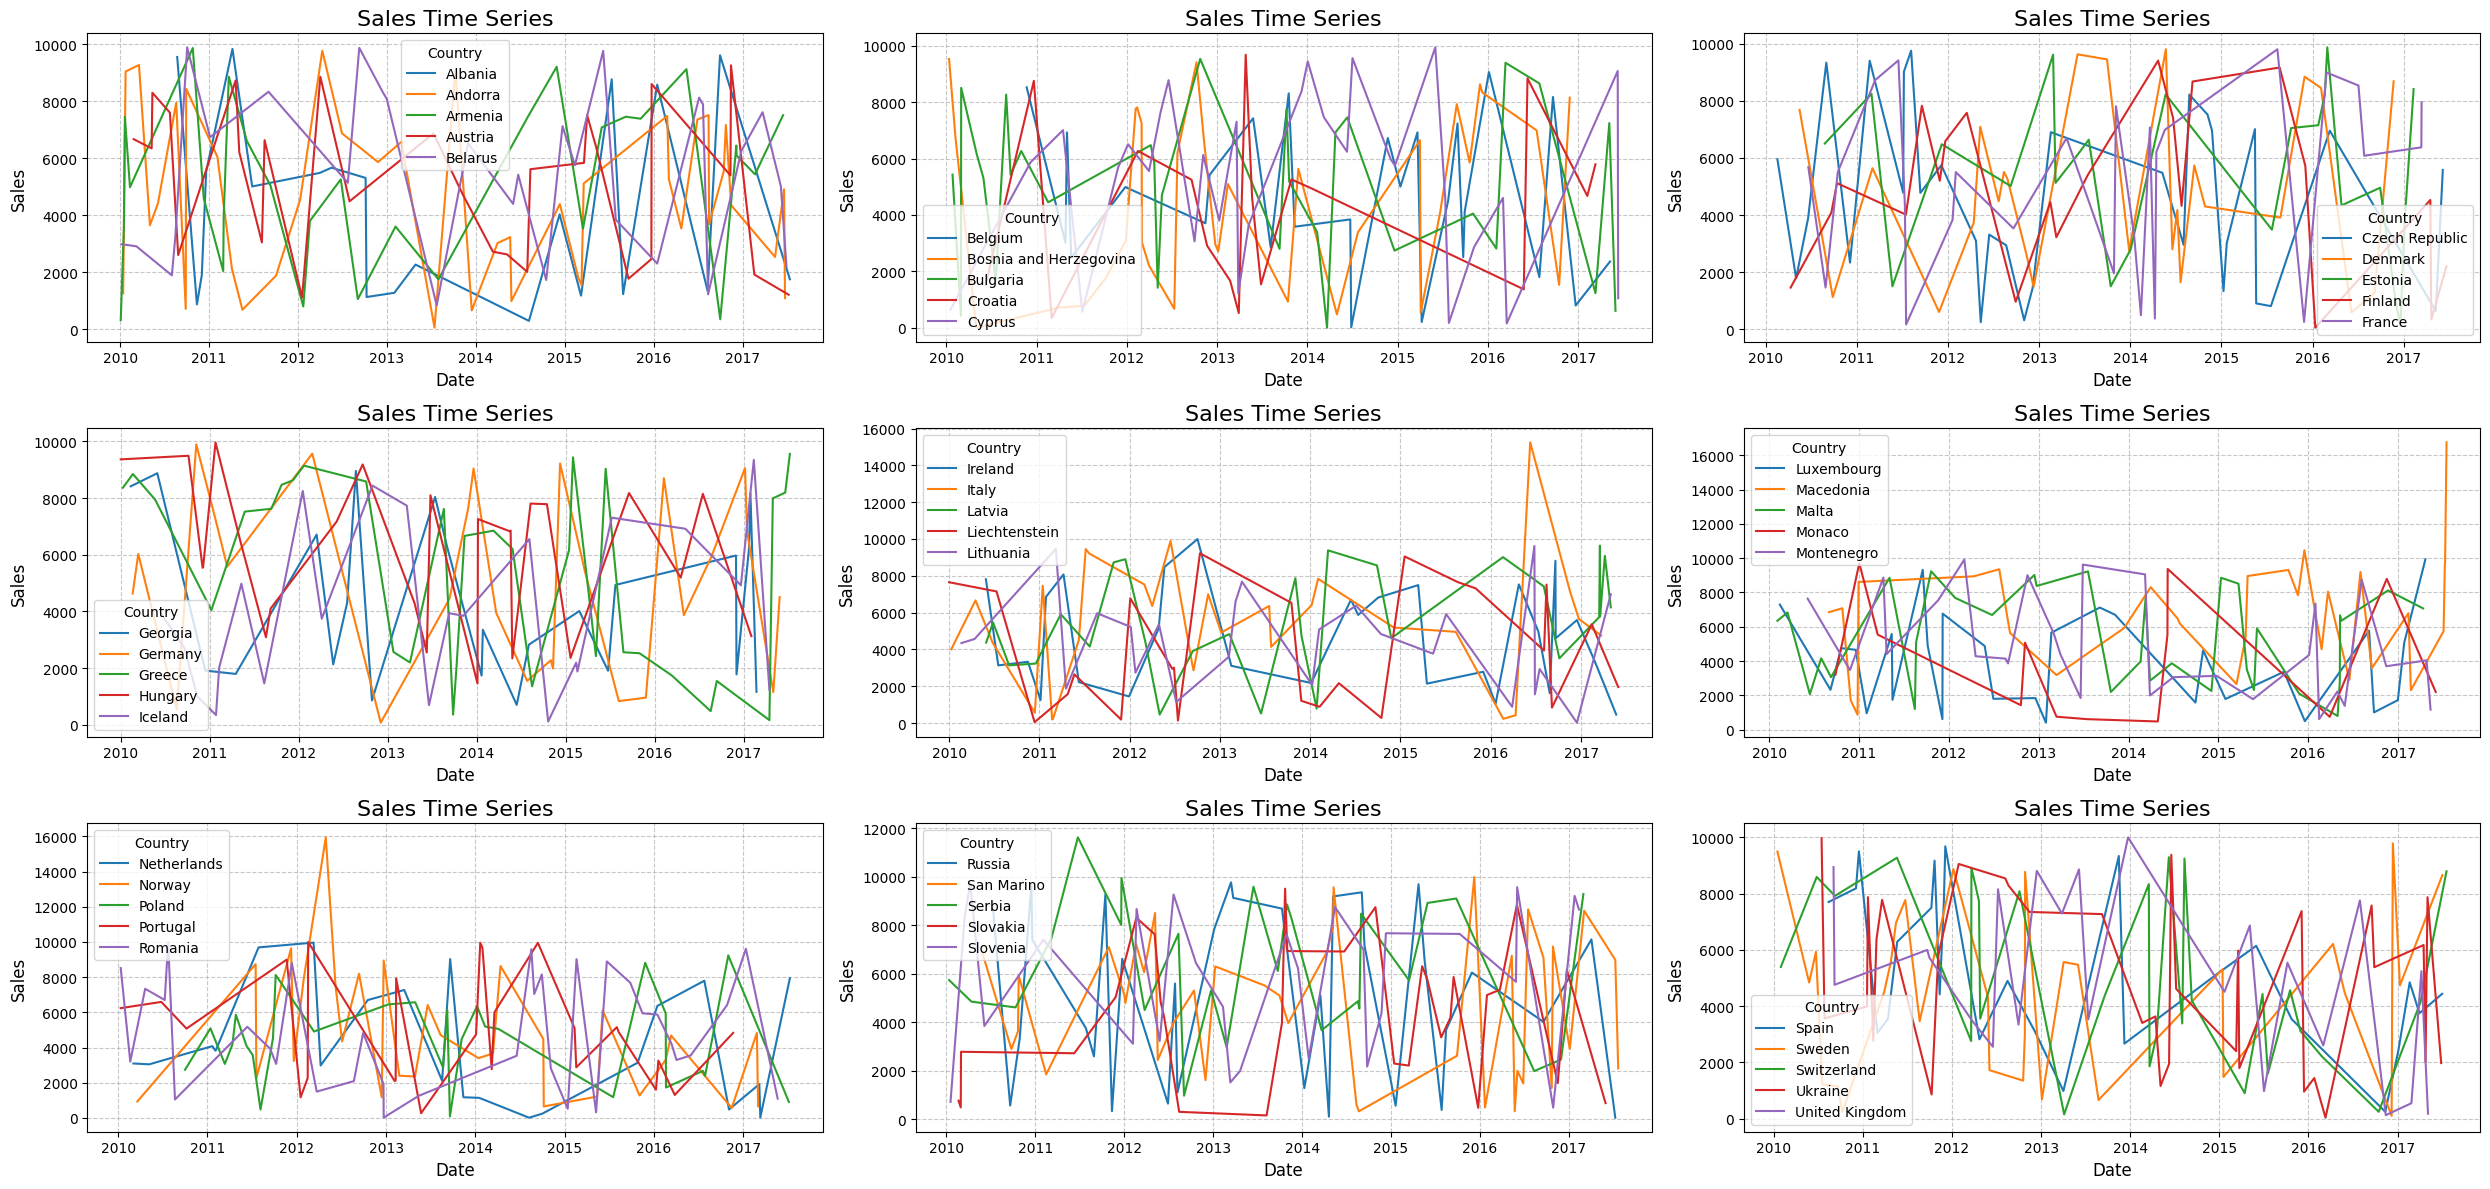

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Кількість підграфіків: 10 (2 ряди по 5 стовпців)
num_rows = 3
num_cols = 3

# Розподіляємо країни на 10 графіків, по 5 країн на кожному
countries_split = [countries[i:i + 5] for i in range(0, len(countries), 5)]

# Налаштування розміру графіка
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 12))

# Створення графіків для кожної групи країн
for row in range(num_rows):
    for col in range(num_cols):
        ax = axes[row, col]

        # Отримуємо країни для поточного підграфіка
        for country in countries_split[row * num_cols + col]:
            country_data = by_country_data[by_country_data["country"] == country]
            ax.plot(
                country_data["order_date"],  # Дані для осі X
                country_data["units_sold"],  # Дані для осі Y
                label=country
            )

        # Налаштування підграфіка
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel("Sales", fontsize=12)
        ax.set_title(f"Sales Time Series", fontsize=16)
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.legend(title="Country")

# Автоматичне розміщення підписів
plt.tight_layout()

# Відображення графіків
plt.show()


In [ ]:

by_region_data = data.groupby(["region", "order_date"])["units_sold"].sum().reset_index()
by_region_data.head()

,region,order_date,units_sold
0,Asia,2010-01-03,313.00
1,Asia,2010-01-16,"3,559.00"
2,Asia,2010-01-18,649.00
3,Asia,2010-01-20,"7,455.00"
4,Asia,2010-02-10,"4,983.00"


In [ ]:
# Create time series plots by gender
regions = by_region_data["region"].unique()

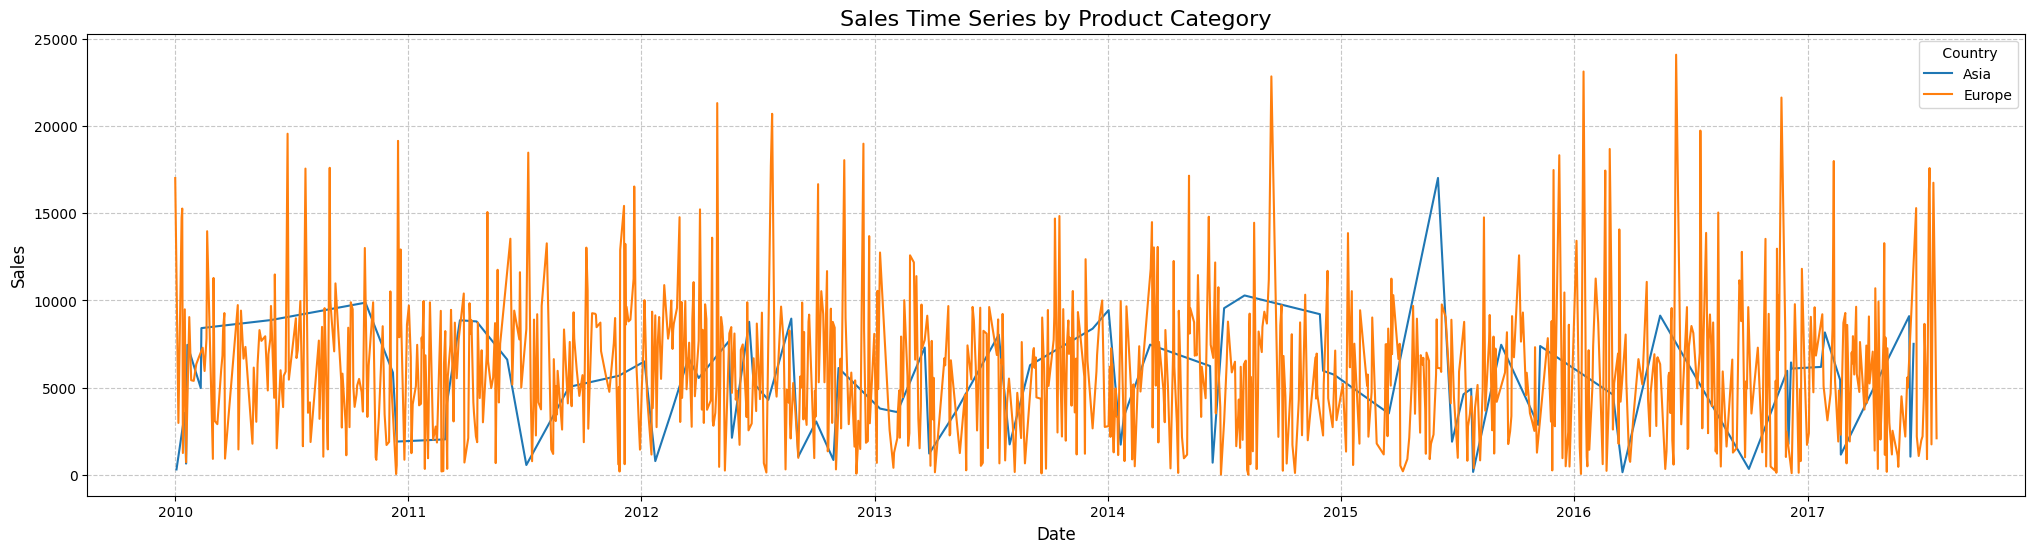

In [ ]:
# Налаштування розміру графіка
plt.figure(figsize=(25, 6))

# Побудова лінійного графіка для кожної категорії
for region in regions:
    region_data = by_region_data[by_region_data["region"] == region]
    plt.plot(
        region_data["order_date"],  # Правильні дані для осі X
        region_data["units_sold"],  # Правильні дані для осі Y
        label=region
    )

# Налаштування графіка
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Sales Time Series by Product Category", fontsize=16)
plt.legend(title=" Country")
plt.grid(True, linestyle="--", alpha=0.7)

# Відображення графіка
plt.show()

#####**Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?**

In [ ]:

data['day_of_week'] = data['order_date'].dt.day_name()


sales_by_day_category = data.groupby(['day_of_week', 'product_category'])['units_sold'].sum().reset_index()

# Sort days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_category['day_of_week'] = pd.Categorical(sales_by_day_category['day_of_week'], categories=days_order, ordered=True)
sales_by_day_category = sales_by_day_category.sort_values(['day_of_week', 'product_category'])


sales_by_day_category.head()


,day_of_week,product_category,units_sold
12,Monday,Baby Food,"57,826.00"
13,Monday,Beverages,"95,311.00"
14,Monday,Cereal,"41,674.00"
15,Monday,Clothes,"68,109.00"
16,Monday,Cosmetics,"55,888.00"


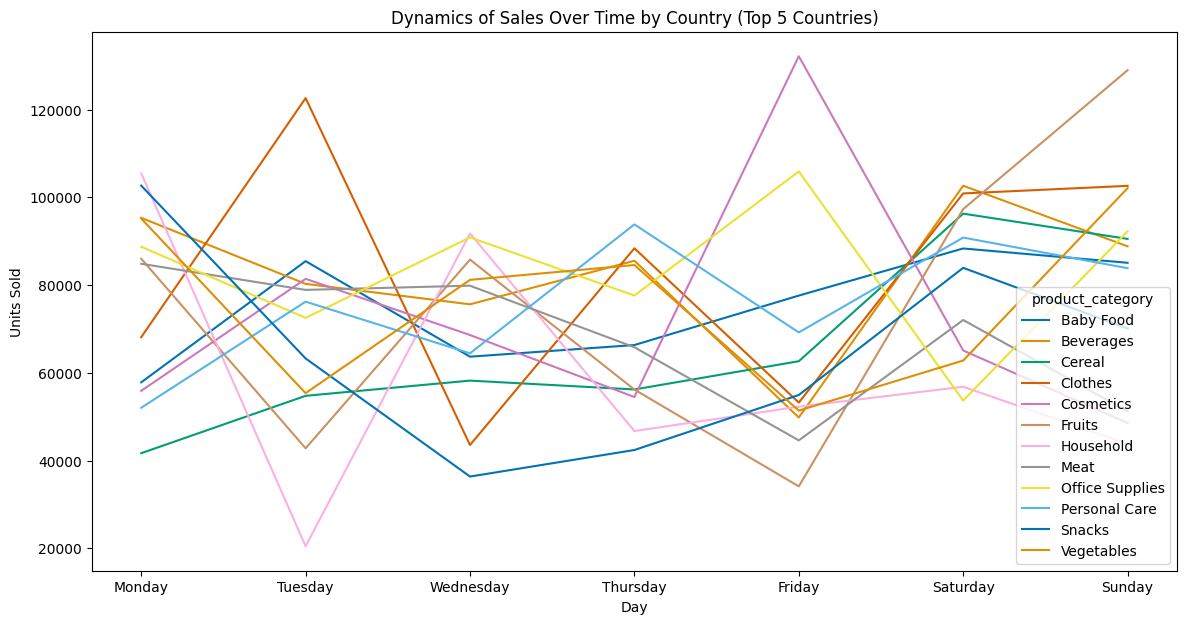

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_day_category, x='day_of_week', y='units_sold', hue='product_category', palette = "colorblind")
plt.title('Dynamics of Sales Over Time by Country (Top 5 Countries)')
plt.xlabel('Day')
plt.ylabel('Units Sold')
plt.show()

можна побачити скачок продажів одягу у вівторок і падіння товарів для дому. У пʼятницю зростання косметики та падіння фруктів

In [ ]:
sales_by_day_chanel = data.groupby(['day_of_week', 'sales_channel'])['units_sold'].sum().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_chanel['day_of_week'] = pd.Categorical(sales_by_day_chanel['day_of_week'], categories=days_order, ordered=True)

sales_by_day_chanel = sales_by_day_chanel.sort_values(['day_of_week', 'sales_channel'])

sales_by_day_chanel.head()


,day_of_week,sales_channel,units_sold
2,Monday,offline,"417,517.00"
3,Monday,online,"516,160.00"
10,Tuesday,offline,"384,079.00"
11,Tuesday,online,"449,896.00"
12,Wednesday,offline,"470,943.00"


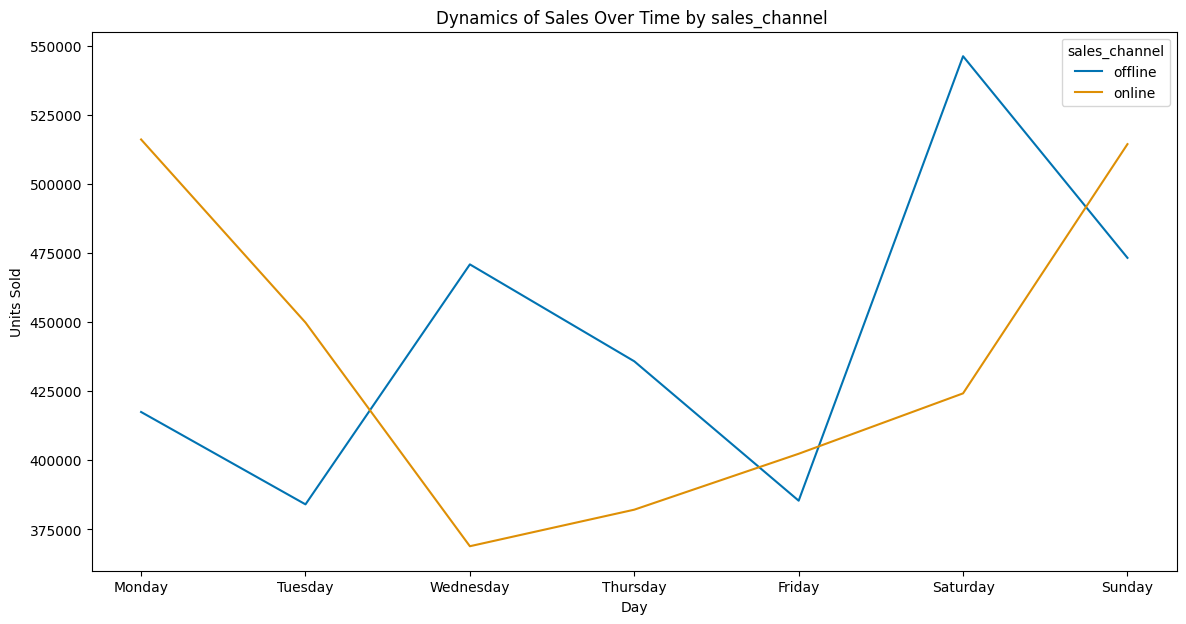

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_day_chanel, x='day_of_week', y='units_sold', hue='sales_channel', palette = "colorblind")
plt.title('Dynamics of Sales Over Time by sales_channel ')
plt.xlabel('Day')
plt.ylabel('Units Sold')
plt.show()

Бачимо падіння продажів онлайн у середу, підняття онлайн у понеділок та нелілю, підняття продажів офлайн у середу та суботу

In [ ]:
sales_by_day_region = data.groupby(['day_of_week', 'region'])['units_sold'].sum().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_region['day_of_week'] = pd.Categorical(sales_by_day_region['day_of_week'], categories=days_order, ordered=True)

sales_by_day_region = sales_by_day_region.sort_values(['day_of_week', 'region'])

sales_by_day_region.head()

,day_of_week,region,units_sold
2,Monday,Asia,"52,995.00"
3,Monday,Europe,"880,682.00"
10,Tuesday,Asia,"58,489.00"
11,Tuesday,Europe,"775,486.00"
12,Wednesday,Asia,"89,923.00"


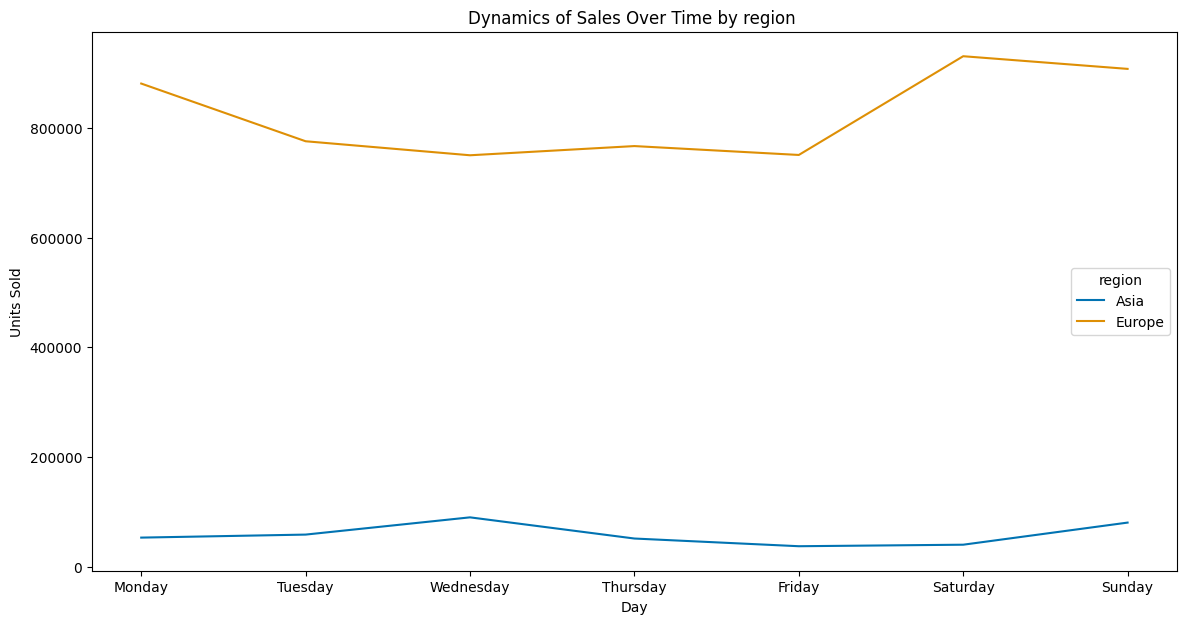

In [ ]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_day_region, x='day_of_week', y='units_sold', hue='region', palette = "colorblind")
plt.title('Dynamics of Sales Over Time by region ')
plt.xlabel('Day')
plt.ylabel('Units Sold')
plt.show()

Бачимо, що покупці з Європи більше активні у суботу та неділю, а з Азії у середу